# **Aprendizado de Máquina** <BR> **Aula 07** - Problemas de agrupamento - Parte 1

# **Exercício 1**. Agrupamento no *dataset Iris* com o algoritmo *HAC*

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

## **1)** Importação de bibliotecas e classes

In [28]:
# Bibliotecas de cálculo, manipulação de dados e geração de gráficos
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [29]:
# Bibliotecas específicas de Machine Learning
from sklearn.preprocessing import StandardScaler    # Padronização de atributos

## **2)** Leitura de dados e exploração inicial

In [30]:
# Leitura do arquivo de dados e exibição do DataFrame
# ATENÇÃO: "monte" o disco e ajuste o caminho do arquivo de dados!
caminho_arquivo = "/content/drive/MyDrive/Colab Notebooks/Aula Machine Learn/A05EXEMPLO1_iris.csv"

df = pd.read_csv(caminho_arquivo)
display(df)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,species
0,5.1,3.5,1.4,0.2,0,Setosa
1,4.9,3.0,1.4,0.2,0,Setosa
2,4.7,3.2,1.3,0.2,0,Setosa
3,4.6,3.1,1.5,0.2,0,Setosa
4,5.0,3.6,1.4,0.2,0,Setosa
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2,Virginica
146,6.3,2.5,5.0,1.9,2,Virginica
147,6.5,3.0,5.2,2.0,2,Virginica
148,6.2,3.4,5.4,2.3,2,Virginica


### **2.1)** Gráficos

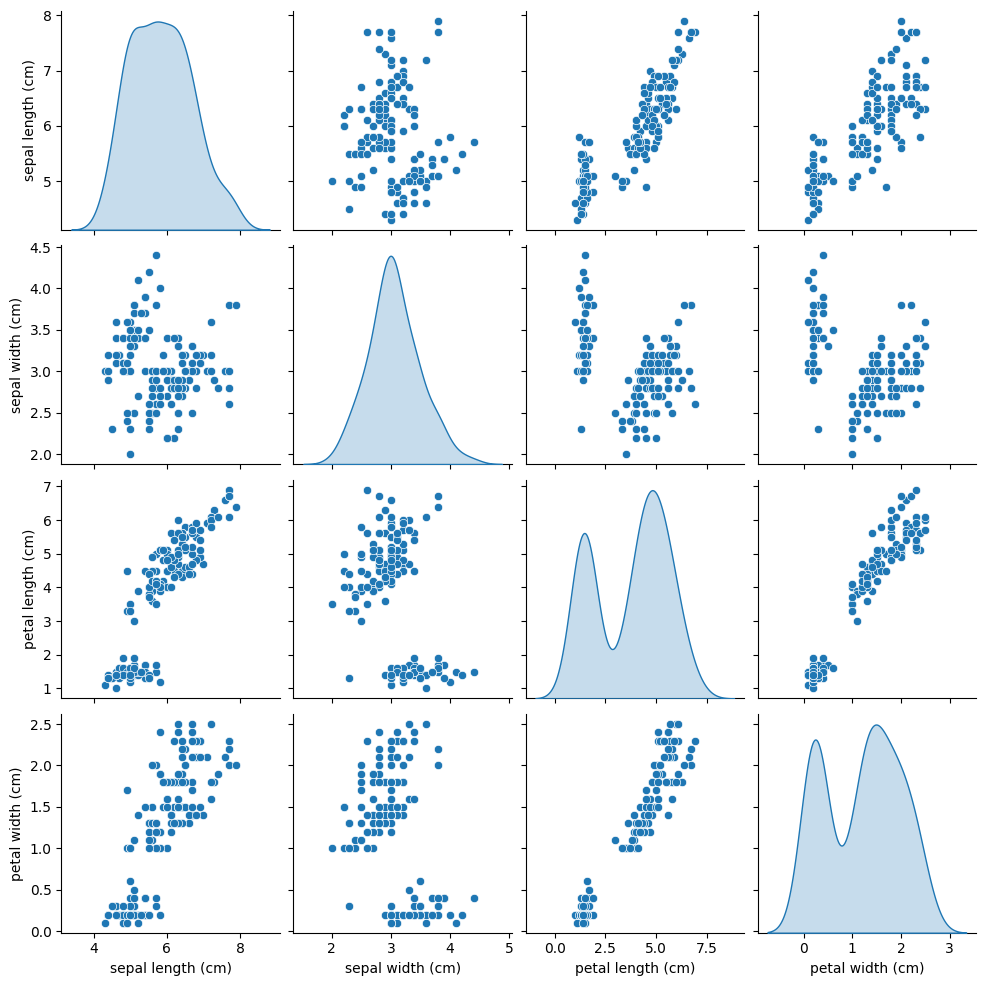

In [31]:
# Matriz de diagramas de dispersão (ignorando a rotulação)
sns.pairplot(data = df.drop(columns = ['target', 'species']), diag_kind = 'kde')
plt.show()

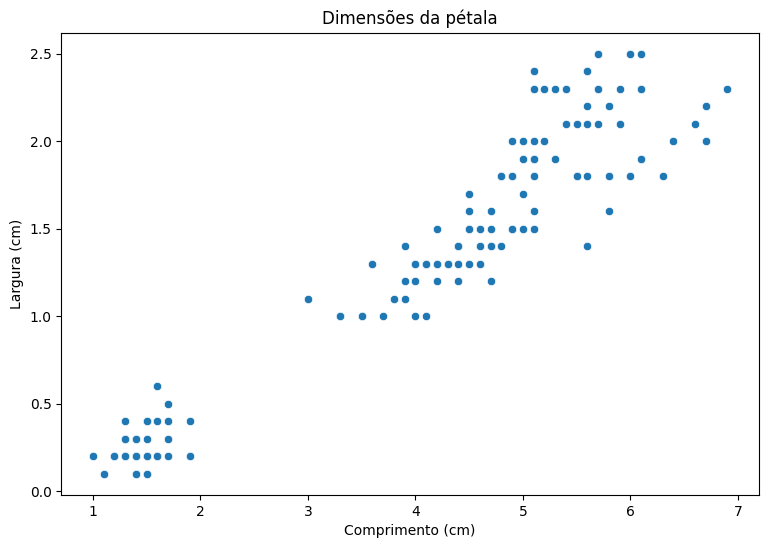

In [32]:
# Diagrama de dispersão entre comprimento e largura da pétala
# Ajustes da figura
# Tamanho do gráfico (polegadas): largura = 9, altura = 6
plt.figure(figsize = (9,6))

# Título e rótulos dos eixos
plt.title("Dimensões da pétala")
plt.xlabel("Comprimento (cm)")
plt.ylabel("Largura (cm)")

sns.scatterplot(data = df, x = 'petal length (cm)', y = 'petal width (cm)')
plt.show()

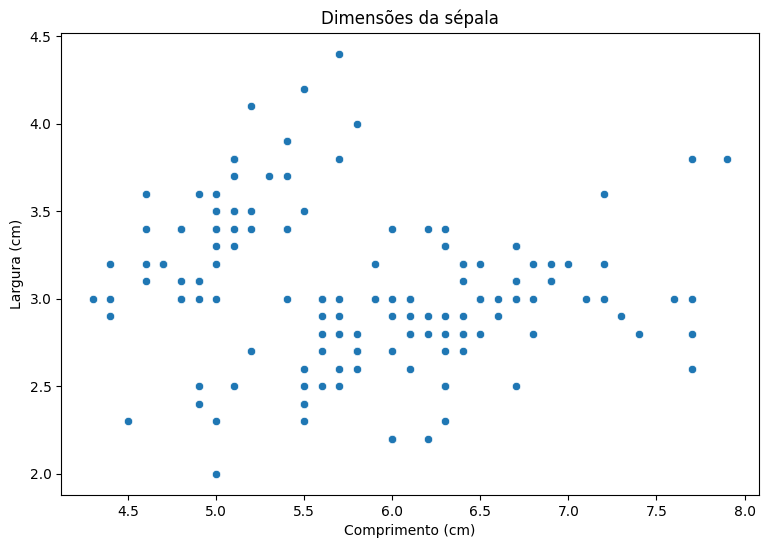

In [33]:
# Diagrama de dispersão entre comprimento e largura da sépala
# Ajustes da figura
# Tamanho do gráfico (polegadas): largura = 9, altura = 6
plt.figure(figsize = (9,6))

# Título e rótulos dos eixos
plt.title("Dimensões da sépala")
plt.xlabel("Comprimento (cm)")
plt.ylabel("Largura (cm)")

sns.scatterplot(data = df, x = 'sepal length (cm)', y = 'sepal width (cm)')
plt.show()

## **3)** Seleção e pré-processamento de variáveis

In [34]:
# Recordando os nomes das colunas do DataFrame
df.columns

Index(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)', 'target', 'species'],
      dtype='object')

In [37]:
# Atributos: 4 dimensões das flores
X = df.drop(columns = ['target','species'])

In [38]:
# Pré-processamento ÚNICO: padronização dos atributos do CONJUNTO COMPLETO DE DADOS
escalonador = StandardScaler()      # Cria instância de objeto "escalonador"
escalonador.fit(X)                  # Calcula a média e a variância dos atributos
X_Padr = escalonador.transform(X)   # Padroniza os dados

## **4)** Agrupamento via algoritmo *HAC*

### **4.1)** Treinamento do *clusterizador*

In [41]:
# Importação da biblioteca necessária para o uso do
# clusterizador hierárquico aglomerativo (HAC)
from sklearn.cluster import AgglomerativeClustering

In [44]:
# PRIMEIRA TENTATIVA:
# Criação de instância e treinamento do HAC,
# formando 2 clusters (padrão)
clt_AC = AgglomerativeClustering(n_clusters = 2)
clt_AC.fit(X_Padr)

AgglomerativeClustering()

### **4.2)** Resultados do agrupamento

In [46]:
print("Rótulos dos elementos:",clt_AC.labels_)

Rótulos dos elementos: [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 0 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0]


In [47]:
print("Rótulos atribuídos:",np.unique(clt_AC.labels_))

Rótulos atribuídos: [0 1]


In [48]:
print("Total de clusters gerados:",clt_AC.n_clusters_)

Total de clusters gerados: 2


In [49]:
print("Total de elementos por cluster:")
print(pd.Series(clt_AC.labels_).value_counts())

Total de elementos por cluster:
0    101
1     49
Name: count, dtype: int64


### **4.3)** Gráficos

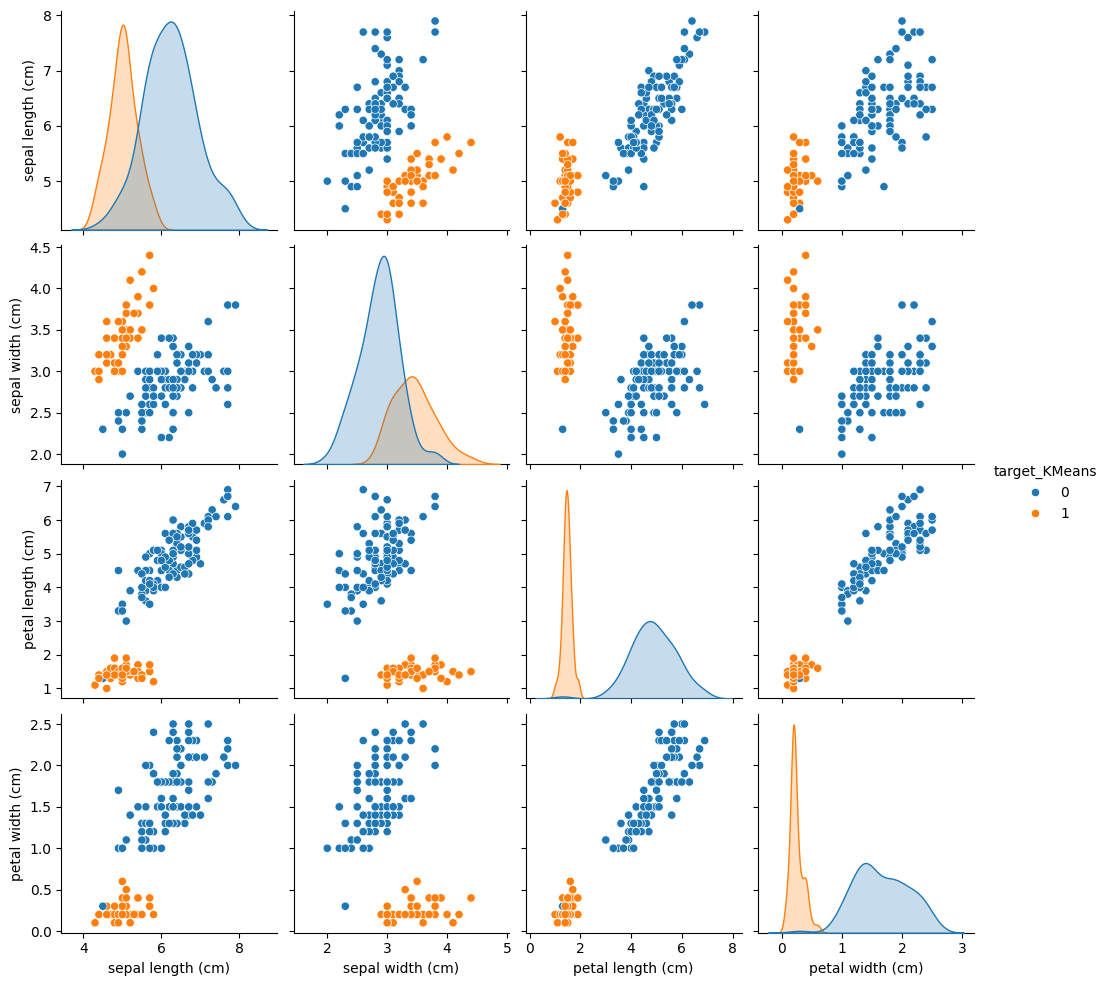

In [51]:
# Matriz de diagramas de dispersão, com separação de cor de acordo
# com a rotulação definida pelo clusterizador

# Atribuição dos rótulos de cluster/cor ao DataFrame
df['target_KMeans'] = clt_AC.labels_

sns.pairplot(data = df.drop(columns = ['target', 'species']),
             diag_kind = 'kde', hue = 'target_KMeans')
plt.show()

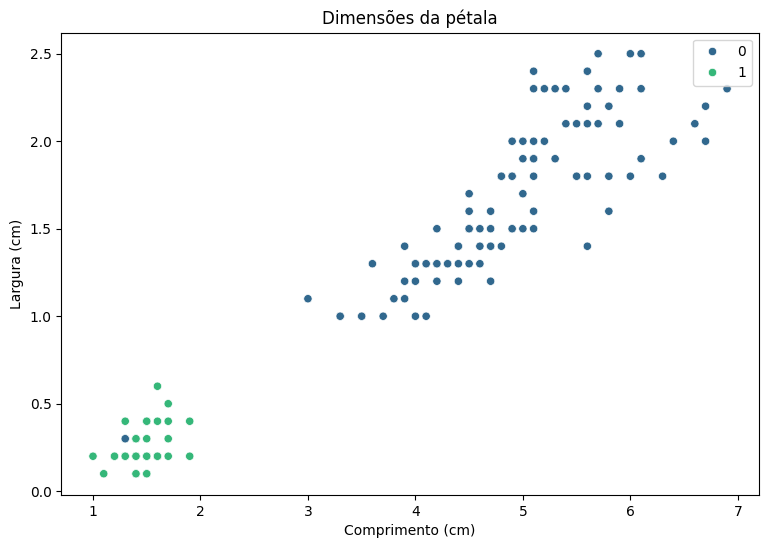

In [52]:
# Diagrama de dispersão entre comprimento e largura da pétala
# Ajustes da figura
# Tamanho do gráfico (polegadas): largura = 9, altura = 6
plt.figure(figsize = (9,6))

# Título e rótulos dos eixos
plt.title("Dimensões da pétala")
plt.xlabel("Comprimento (cm)")
plt.ylabel("Largura (cm)")

sns.scatterplot(data = df, x = 'petal length (cm)', y = 'petal width (cm)',
                hue = clt_AC.labels_, palette = 'viridis')
plt.show()

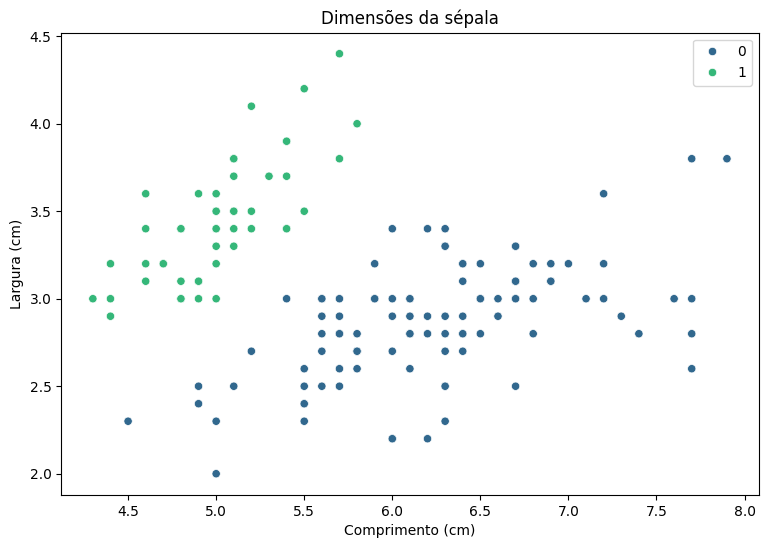

In [53]:
# Diagrama de dispersão entre comprimento e largura da sépala
# Ajustes da figura
# Tamanho do gráfico (polegadas): largura = 9, altura = 6
plt.figure(figsize = (9,6))

# Título e rótulos dos eixos
plt.title("Dimensões da sépala")
plt.xlabel("Comprimento (cm)")
plt.ylabel("Largura (cm)")

sns.scatterplot(data = df, x = 'sepal length (cm)', y = 'sepal width (cm)',
                hue = clt_AC.labels_, palette = 'viridis')
plt.show()

### **4.4)** Número "ideal" de grupos: <u>método do cotovelo</u>

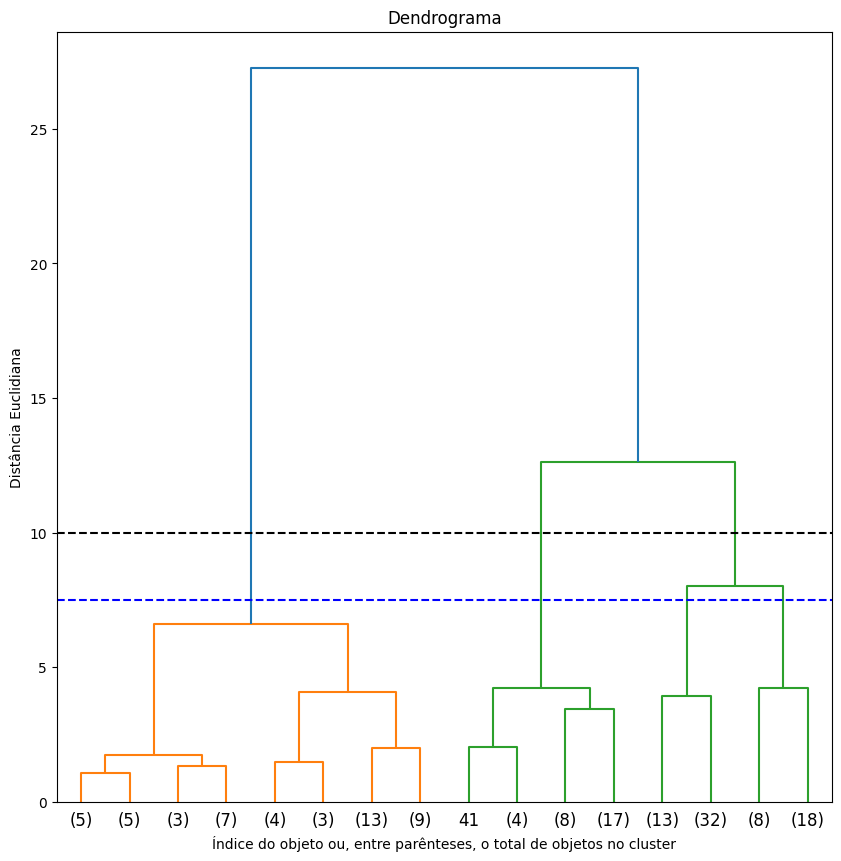

In [55]:
# Importação das bibliotecas necessárias
from scipy.cluster.hierarchy import dendrogram, linkage

# Criação e representação gráfica da estrutura em árvore, truncada no 3o nível
# O "p-ésimo" nível inclui todos os nós que estejam a "p" fusões/aglomerações
# da fusão/aglomeração final
plt.figure(figsize = (10,10))
dendro = dendrogram(linkage(X_Padr,method = 'ward'),truncate_mode = "level", p = 3)
plt.title("Dendrograma")
plt.xlabel("Índice do objeto ou, entre parênteses, o total de objetos no cluster")
plt.ylabel("Distância Euclidiana")
plt.axhline(y = 10,linestyle = '--',color = 'black')  # "Linha de corte" preta: 3 clusters
plt.axhline(y = 7.5,linestyle = '--',color = 'blue')  # "Linha de corte" azul: 4 clusters
plt.show()

### **4.5)** Agrupamento final

In [56]:
# Treinamento do HAC, com 3 clusters
# Criação de instância e treinamento do clusterizador
clt_AC = AgglomerativeClustering(n_clusters = 3)
clt_AC.fit(X_Padr)

AgglomerativeClustering(n_clusters=3)

### **4.6)** Gráficos finais

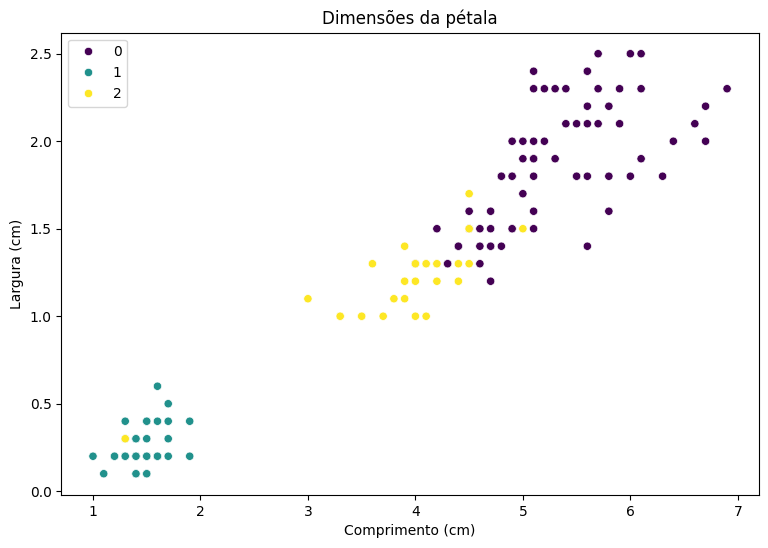

In [57]:
# Diagrama de dispersão entre comprimento e largura da pétala
# Ajustes da figura
# Tamanho do gráfico (polegadas): largura = 9, altura = 6
plt.figure(figsize = (9,6))

# Título e rótulos dos eixos
plt.title("Dimensões da pétala")
plt.xlabel("Comprimento (cm)")
plt.ylabel("Largura (cm)")

sns.scatterplot(data = df, x = 'petal length (cm)', y = 'petal width (cm)',
                hue = clt_AC.labels_, palette = 'viridis')
plt.show()

---
**Fim do Exercício 1 da Aula 07**